In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn import metrics


In [5]:
#Loading the data from CSV file to pandas DataFrame
Car_data=pd.read_csv("/content/car data.csv")

In [6]:
Car_data.head()
#This returns first entries of the data

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


In [8]:
Car_data.shape
# This gives the number of columns and rows

(301, 9)

In [10]:
#Getting statistical information from the dataset
Car_data.describe()

,Year,Selling_Price,Present_Price,Kms_Driven,Owner
count,301.000000,301.000000,301.000000,301.000000,301.000000
mean,2013.627907,4.661296,7.628472,36947.205980,0.043189
std,2.891554,5.082812,8.644115,38886.883882,0.247915
min,2003.000000,0.100000,0.320000,500.000000,0.000000
25%,2012.000000,0.900000,1.200000,15000.000000,0.000000
50%,2014.000000,3.600000,6.400000,32000.000000,0.000000
75%,2016.000000,6.000000,9.900000,48767.000000,0.000000
max,2018.000000,35.000000,92.600000,500000.000000,3.000000


In [12]:
Car_data.info()
# Getting some general data from the dataset

# Here we can see there are no null datas at any place.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Car_Name       301 non-null    object 
 1   Year           301 non-null    int64  
 2   Selling_Price  301 non-null    float64
 3   Present_Price  301 non-null    float64
 4   Kms_Driven     301 non-null    int64  
 5   Fuel_Type      301 non-null    object 
 6   Seller_Type    301 non-null    object 
 7   Transmission   301 non-null    object 
 8   Owner          301 non-null    int64  
dtypes: float64(2), int64(3), object(4)
memory usage: 21.3+ KB


In [14]:
# Another way to find the missing value
Car_data.isnull().sum()

#Here too we can confirm that the null values are absent.

Car_Name         0
Year             0
Selling_Price    0
Present_Price    0
Kms_Driven       0
Fuel_Type        0
Seller_Type      0
Transmission     0
Owner            0
dtype: int64

In [16]:
# To get the count of different entities in the column
print(Car_data.Fuel_Type.value_counts())
print(Car_data.Transmission.value_counts())
print(Car_data.Seller_Type.value_counts())

Petrol    239
Diesel     60
CNG         2
Name: Fuel_Type, dtype: int64
Manual       261
Automatic     40
Name: Transmission, dtype: int64
Dealer        195
Individual    106
Name: Seller_Type, dtype: int64


In [17]:
# Encoding the categorical data, as model will be more compfortable with numbers rather than text.
Car_data.replace({"Fuel_Type":{"Petrol":0,"Diesel":1,"CNG":2}},inplace=True);
Car_data.replace({"Seller_Type":{"Dealer":0,"Individual":1}},inplace=True);
Car_data.replace({"Transmission":{"Manual":0,"Automatic":1}},inplace=True);

In [19]:
Car_data.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,0,0,0,0
1,sx4,2013,4.75,9.54,43000,1,0,0,0
2,ciaz,2017,7.25,9.85,6900,0,0,0,0
3,wagon r,2011,2.85,4.15,5200,0,0,0,0
4,swift,2014,4.60,6.87,42450,1,0,0,0


In [23]:
#Splitting The data

X=Car_data.drop(["Car_Name","Selling_Price"],axis=1);
Y=Car_data["Selling_Price"];

In [27]:
# TRAIN & TEST Data
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.1,random_state=2)

Linear Regression

In [44]:
lin_reg_model=LinearRegression()
lin_reg_model.fit(X_train,Y_train)

LinearRegression()

In [29]:
# Predicting the data and finding the error/ Accuracy
lin_reg_predict_training=lin_reg_model.predict(X_train);

In [32]:
# R square error is used for calculating the Training error
Training_error_score=metrics.r2_score(Y_train,lin_reg_predict_training)
print(Training_error_score)

#Note:
# Accuracy score is used in classification problem, which when is high, we can say that the model is well performing.
# R square error is used to eveluate the  regression model, which when is low we can't say that model has less error and vice-versa.

0.8799451660493711


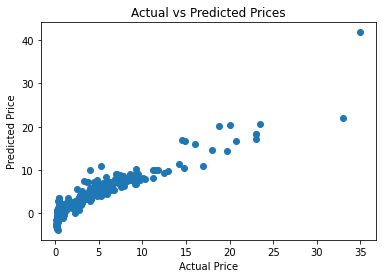

In [34]:
# Visualizing the actual and predicted prices
plt.scatter(Y_train,lin_reg_predict_training)
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title("Actual vs Predicted Prices")
plt.show()


In [40]:
# Predicting the data and finding the error/ Accuracy
lin_reg_predict_test=lin_reg_model.predict(X_test);

In [41]:
# R square error is used for calculating the Testerror
Test_error_score=metrics.r2_score(Y_test,lin_reg_predict_test)
print(Test_error_score)

#Note:
# Accuracy score is used in classification problem, which when is high, we can say that the model is well performing.
# R square error is used to eveluate the  regression model, which when is low we can't say that model has less error and vice-versa.

0.8365766715027051


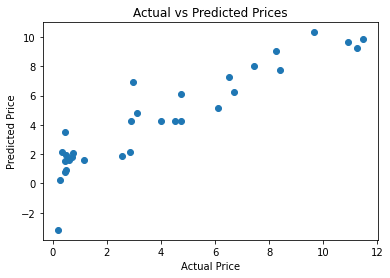

In [42]:
# Visualizing the actual and predicted prices
plt.scatter(Y_test,lin_reg_predict_test)
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title("Actual vs Predicted Prices")
plt.show()

In [43]:
# NOTE:

# Linear Regression model perfroms well when the feature is positively co-related with output,
# Whereas Lasso Regression & XGBoost generally outperforms Linear Regression model

LASSO Regressing (Following the same step as Linear Regression)

In [45]:
las_reg_model=Lasso()
las_reg_model.fit(X_train,Y_train)

Lasso()

In [46]:
# Predicting the data and finding the error/ Accuracy
las_reg_predict_training=las_reg_model.predict(X_train);

In [47]:
# R square error is used for calculating the Training error
Training_error_score=metrics.r2_score(Y_train,las_reg_predict_training)
print(Training_error_score)

#Note:
# Accuracy score is used in classification problem, which when is high, we can say that the model is well performing.
# R square error is used to eveluate the  regression model, which when is low we can't say that model has less error and vice-versa.

0.8427856123435794


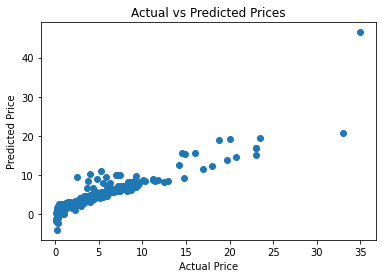

In [48]:
# Visualizing the actual and predicted prices
plt.scatter(Y_train,las_reg_predict_training)
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title("Actual vs Predicted Prices")
plt.show()

In [49]:
# Predicting the data and finding the error/ Accuracy
las_reg_predict_test=las_reg_model.predict(X_test);

In [50]:
# R square error is used for calculating the Testerror
Test_error_score=metrics.r2_score(Y_test,las_reg_predict_test)
print(Test_error_score)

#Note:
# Accuracy score is used in classification problem, which when is high, we can say that the model is well performing.
# R square error is used to eveluate the  regression model, which when is low we can't say that model has less error and vice-versa.

0.8709167941173195


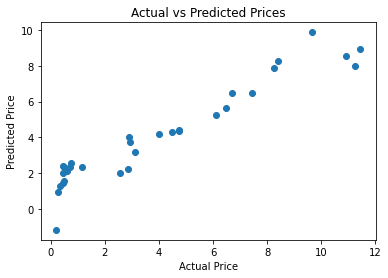

In [51]:
# Visualizing the actual and predicted prices
plt.scatter(Y_test,las_reg_predict_test)
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title("Actual vs Predicted Prices")
plt.show()